## ROI interactive segmentation

In [1]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from mpl_interactions import image_segmenter 
import ipywidgets as widgets
import os
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

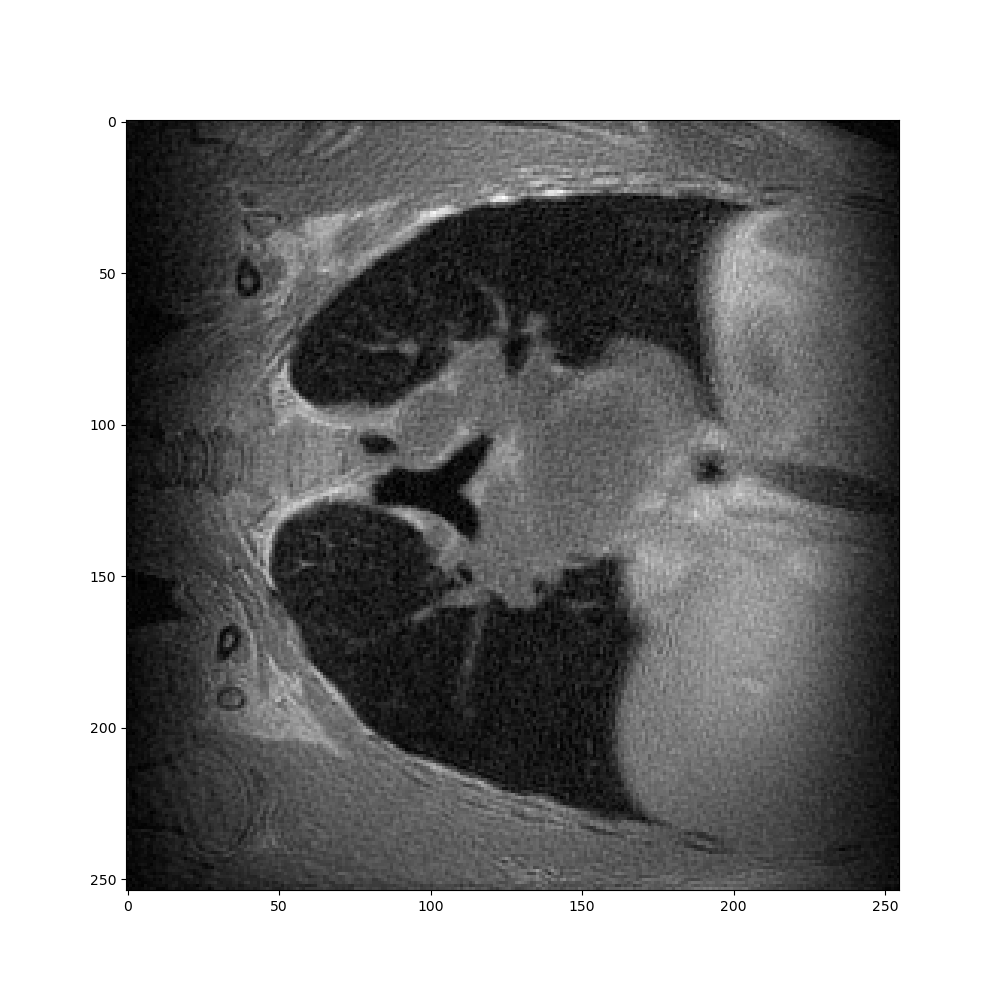

In [3]:
path = '../../data/imrh_128b/slices/lammy0_slice125.png'
slice_2d = mpimg.imread(path)

N_classes = 4
class_selector = widgets.Dropdown(options=list(range(1, N_classes + 1)), description="class")


def update(change):
    multi_class_segmenter.current_class = class_selector.value
    multi_class_segmenter.erasing = erasing_button.value


erasing_button = widgets.Checkbox(value=False, description="Erasing")
erasing_button.observe(update, names="value")

class_selector.observe(update, names="value")
multi_class_segmenter = image_segmenter(slice_2d, nclasses=4, mask_alpha=0.65)
display(widgets.HBox([erasing_button, class_selector]))
display(multi_class_segmenter)

In [4]:
np.save('masks/imrh_128b/slice_125.npy',multi_class_segmenter.mask)

## SNR computation 

In [5]:

def get_grayscale_img(path):
    img = mpimg.imread(path)
    if img.shape[-1] == 4:
        img = img[..., :3]  
    grayscale_img = np.mean(img, axis=-1)
    grayscale_img /= np.amax(grayscale_img)
    return(grayscale_img)

def aSNR(img, mask):
    # calculate std and mean
    img_p = img[mask==1] # parenchyma
    img_a = img[mask==2] # aorta
    img_t = img[mask==3] # trachea
    img_b = img[mask==4] # background
        
    # calculate SNR
    p_snr = np.mean(img_p) / np.std(img_b)
    a_snr = np.mean(img_a) / np.std(img_b)
    t_snr = np.mean(img_t) / np.std(img_b)
    
    return p_snr, a_snr, t_snr


In [23]:
slice_path = '../../data/imrh_114a/slices'
files = os.listdir(slice_path)
imrh_114a_mask = np.load('masks/imrh_114a/slice_120.npy')
snr_data_114a = []

for file in files:
    if file.endswith("slice120.png"):
        img_path = os.path.join(slice_path,file)
        img = get_grayscale_img(img_path)
        lammy_value = float(file.split('_')[0].replace('lammy', ''))
        
        p_snr, a_snr, t_snr = aSNR(img,imrh_114a_mask)
        snr_data_114a.append({'lammy': lammy_value, 
                             'p_snr': p_snr, 
                             'a_snr': a_snr, 
                             't_snr': t_snr})


snr_data_114a = pd.DataFrame(snr_data_114a)


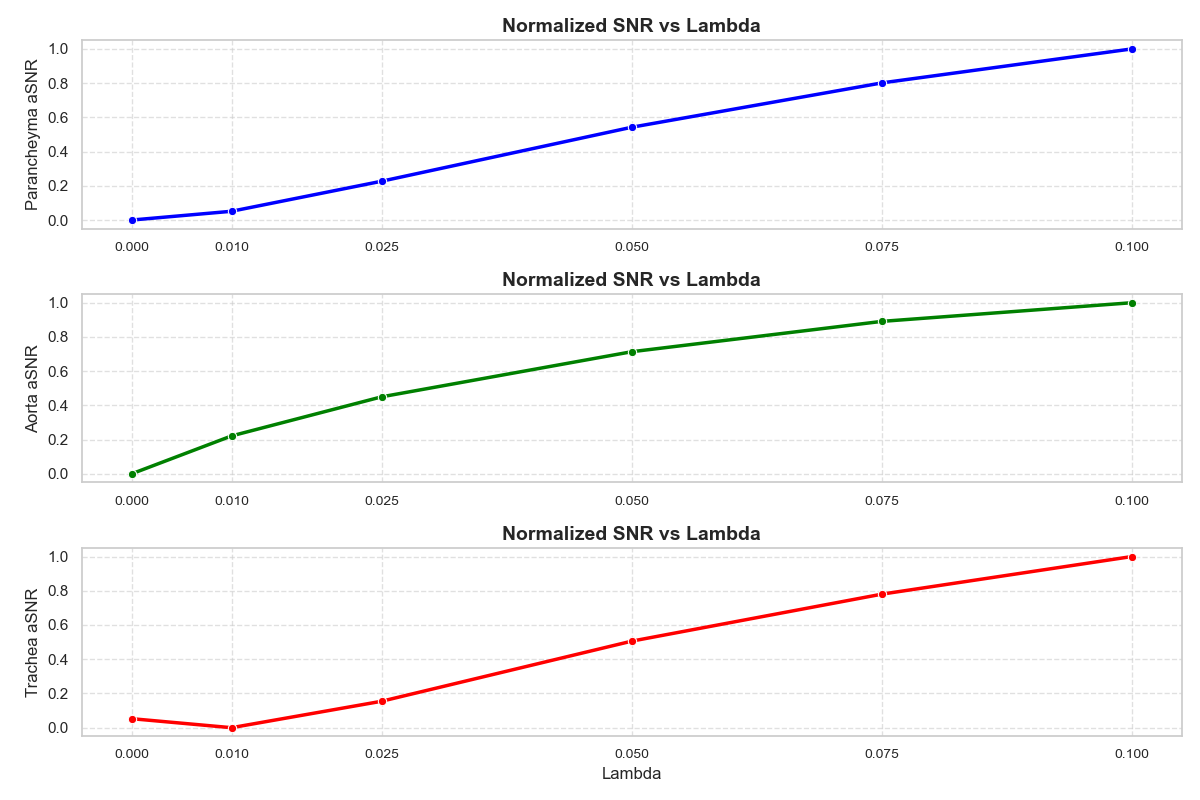

In [24]:
scaler = MinMaxScaler()
snr_data_114a[['scaled_p_snr', 'scaled_a_snr', 'scaled_t_snr']] = scaler.fit_transform(snr_data_114a[['p_snr', 'a_snr', 't_snr']])

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
sns.lineplot(x='lammy', y='scaled_p_snr', data=snr_data_114a, marker='o', color="blue", lw=2.5)
plt.title('Normalized SNR vs Lambda', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('Parancheyma aSNR', fontsize=12)
plt.xticks(ticks=snr_data_114a['lammy'], labels=[f'{lammy:.3f}' for lammy in snr_data_114a['lammy']], fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(3, 1, 2)
sns.lineplot(x='lammy', y='scaled_a_snr', data=snr_data_114a, marker='o', color="green", lw=2.5)
plt.title('Normalized SNR vs Lambda', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('Aorta aSNR', fontsize=12)
plt.xticks(ticks=snr_data_114a['lammy'], labels=[f'{lammy:.3f}' for lammy in snr_data_114a['lammy']], fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(3, 1, 3)
sns.lineplot(x='lammy', y='scaled_t_snr', data=snr_data_114a, marker='o', color="red", lw=2.5)
plt.title('Normalized SNR vs Lambda', fontsize=14, fontweight='bold')
plt.xlabel('Lambda', fontsize=12)
plt.ylabel('Trachea aSNR', fontsize=12)
plt.xticks(ticks=snr_data_114a['lammy'], labels=[f'{lammy:.3f}' for lammy in snr_data_114a['lammy']], fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [11]:
slice_path = '../../data/imrh_128b/slices'
files = os.listdir(slice_path)
imrh_128_mask = np.load('masks/imrh_128b/slice_125.npy')
snr_data_128b = []

for file in files:
    if file.endswith("slice125.png"):
        img_path = os.path.join(slice_path,file)
        rgb_img = get_grayscale_img(img_path)
        lammy_value = float(file.split('_')[0].replace('lammy', ''))
        
        p_snr, a_snr, t_snr = aSNR(rgb_img,imrh_128_mask)
        snr_data_128b.append({'lammy': lammy_value, 
                             'p_snr': p_snr, 
                             'a_snr': a_snr, 
                             't_snr': t_snr})


snr_data_128b = pd.DataFrame(snr_data_128b)

## Visualise results 

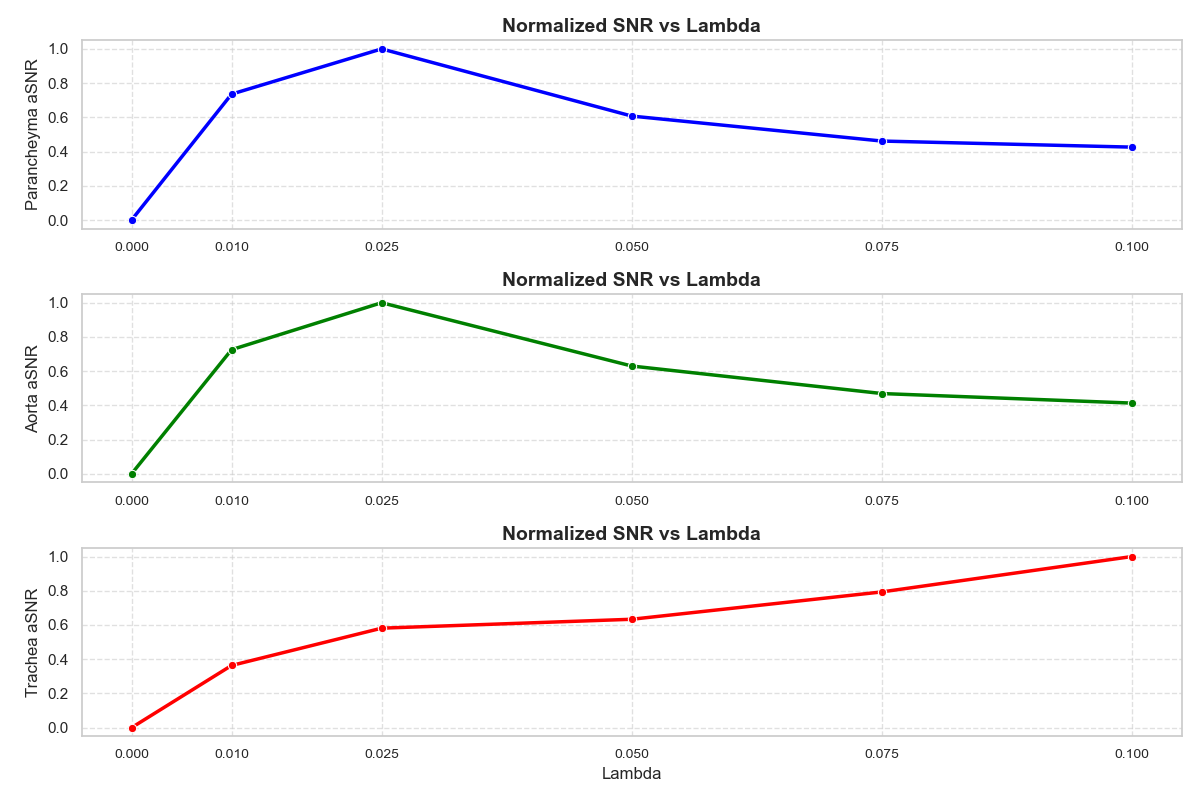

In [13]:
scaler = MinMaxScaler()
snr_data_128b[['scaled_p_snr', 'scaled_a_snr', 'scaled_t_snr']] =  scaler.fit_transform(snr_data_128b[['p_snr', 'a_snr', 't_snr']])

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
sns.lineplot(x='lammy', y='scaled_p_snr', data=snr_data_128b, marker='o', color="blue", lw=2.5)
plt.title('Normalized SNR vs Lambda', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('Parancheyma aSNR', fontsize=12)
plt.xticks(ticks=snr_data_128b['lammy'], labels=[f'{lammy:.3f}' for lammy in snr_data_128b['lammy']], fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(3, 1, 2)
sns.lineplot(x='lammy', y='scaled_a_snr', data=snr_data_128b, marker='o', color="green", lw=2.5)
plt.title('Normalized SNR vs Lambda', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('Aorta aSNR', fontsize=12)
plt.xticks(ticks=snr_data_128b['lammy'], labels=[f'{lammy:.3f}' for lammy in snr_data_128b['lammy']], fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(3, 1, 3)
sns.lineplot(x='lammy', y='scaled_t_snr', data=snr_data_128b, marker='o', color="red", lw=2.5)
plt.title('Normalized SNR vs Lambda', fontsize=14, fontweight='bold')
plt.xlabel('Lambda', fontsize=12)
plt.ylabel('Trachea aSNR', fontsize=12)
plt.xticks(ticks=snr_data_128b['lammy'], labels=[f'{lammy:.3f}' for lammy in snr_data_128b['lammy']], fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [ ]:
snr_data_114a